# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

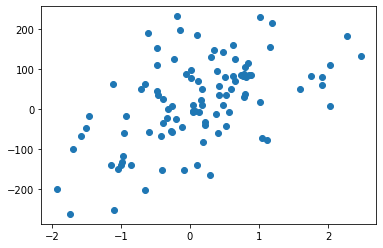

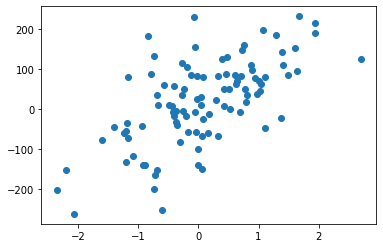

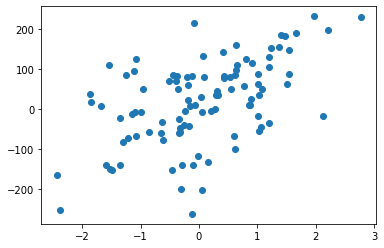

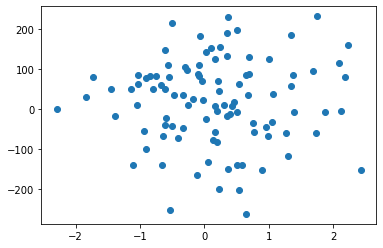

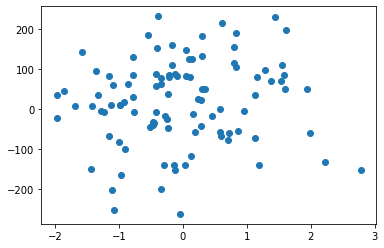

In [15]:

import matplotlib.pyplot as plt
for i in range(5):
  plt.scatter(X[:,i],y)
  plt.show()

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [19]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([keras.Input(5),keras.layers.Dense(5, activation='relu'),keras.layers.Dense(5, activation='relu'),keras.layers.Dense(1)])
opt = tf.keras.optimizers.SGD(learning_rate=0.06)
model.compile(loss=tf.keras.losses.MeanSquaredError())
history=model.fit(X_train,y_train,validation_split=0.33,epochs=230,batch_size=2)

Epoch 1/230
27/27 [==============================] - 1s 7ms/step - loss: 12103.8115 - val_loss: 10247.0479
Epoch 2/230
27/27 [==============================] - 0s 3ms/step - loss: 12097.8535 - val_loss: 10242.8896
Epoch 3/230
27/27 [==============================] - 0s 3ms/step - loss: 12091.8906 - val_loss: 10238.7041
Epoch 4/230
27/27 [==============================] - 0s 3ms/step - loss: 12085.9824 - val_loss: 10232.4619
Epoch 5/230
27/27 [==============================] - 0s 3ms/step - loss: 12079.9131 - val_loss: 10226.9131
Epoch 6/230
27/27 [==============================] - 0s 3ms/step - loss: 12073.4297 - val_loss: 10220.8203
Epoch 7/230
27/27 [==============================] - 0s 3ms/step - loss: 12065.7920 - val_loss: 10213.4541
Epoch 8/230
27/27 [==============================] - 0s 3ms/step - loss: 12057.8564 - val_loss: 10206.8877
Epoch 9/230
27/27 [==============================] - 0s 3ms/step - loss: 12049.6875 - val_loss: 10199.1025
Epoch 10/230
27/27 [=================


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

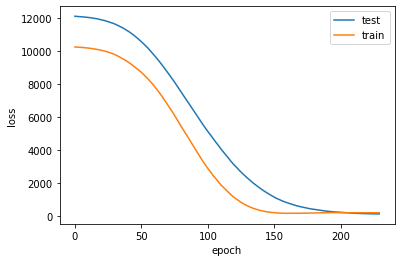

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test','train'])
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [21]:
import numpy as np
from sklearn.metrics import r2_score
predictions=model.predict(X_test)
print(predictions)
accu = r2_score(y_test,predictions)
print("Accuracy:", accu)
print(y_test)

[[ 162.55573 ]
 [-136.7924  ]
 [  63.621853]
 [-133.9853  ]
 [  -5.162861]
 [ -82.54508 ]
 [  55.08005 ]
 [  26.509747]
 [-145.45982 ]
 [ 143.55104 ]
 [  88.4598  ]
 [ 144.31512 ]
 [  39.32738 ]
 [ 118.73373 ]
 [  74.694374]
 [  95.09522 ]
 [ 187.8099  ]
 [  81.306854]
 [ 119.22342 ]
 [ -68.46275 ]]
Accuracy: 0.9580973911703754
[ 215.47124758 -131.1390209    79.87403933 -140.76311462   -7.91882959
  -59.29081497   34.92501227   24.22069865 -139.33799971  153.57904985
   68.95790292  130.17425384   29.65951354   80.53740813   57.63151087
   80.93091525  198.17702362   59.77779093   86.26391892  -66.93162171]


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

## Generate dateset

In [25]:
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Creating model

1.   Model has 6 hidden layers of dense 50 each
2.   Adam optimizer is used and mse is used as a loss function



In [26]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([keras.Input(5),
                          keras.layers.Dense(50, activation='relu'),keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(1)])
opt = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='mse')
history=model.fit(X_train,y_train,validation_split=0.1,epochs=5,batch_size=2)

Epoch 1/5
3600/3600 [==============================] - 7s 2ms/step - loss: 542.7628 - val_loss: 105.0305
Epoch 2/5
3600/3600 [==============================] - 6s 2ms/step - loss: 61.0482 - val_loss: 198.6302
Epoch 3/5
3600/3600 [==============================] - 6s 2ms/step - loss: 56.2035 - val_loss: 91.9054
Epoch 4/5
3600/3600 [==============================] - 6s 2ms/step - loss: 54.8107 - val_loss: 34.0061
Epoch 5/5
3600/3600 [==============================] - 6s 2ms/step - loss: 53.1269 - val_loss: 29.8570


## Visulazing the data

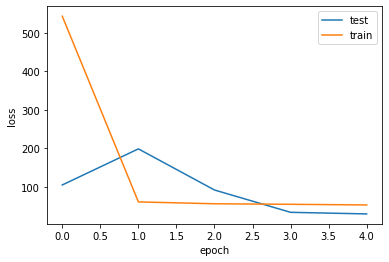

In [27]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test','train'])
plt.show()

## r2_score

In [28]:
import numpy as np
from sklearn.metrics import r2_score
predictions=model.predict(X_test)
print(predictions)
accu = r2_score(y_test,predictions)
print("Accuracy:", accu)
print(y_test)

[[-99.74131 ]
 [ 62.160343]
 [ 72.060646]
 ...
 [ 14.229921]
 [-52.456608]
 [-85.36296 ]]
Accuracy: 0.9978419666368175
[-91.72292135  52.55742745  72.44587524 ...   7.18010497 -59.23469434
 -82.08750428]
